# Decision Tree Regression

# CART - Classificaton

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

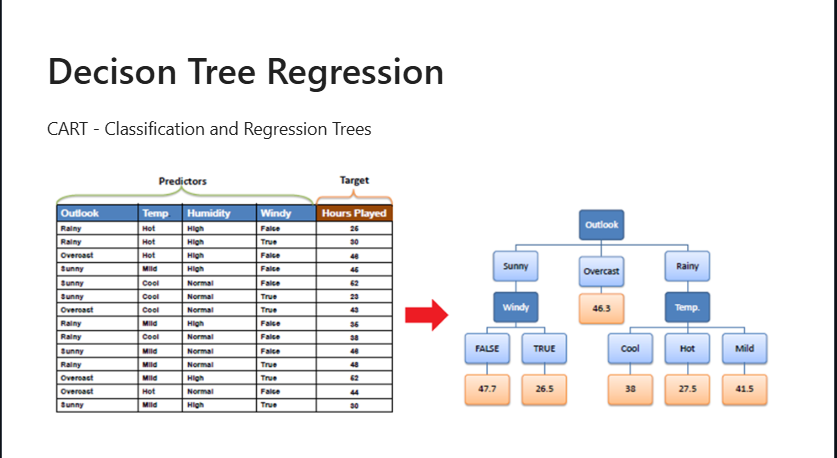

# Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Features
1.AT - Atmospheric Tempreature degree celsius
2.V - Vaccum Pressure Pa
3.AP - Atmospheric Pressure Pa
4.RH - Relative Humidity %
5.PE - Energy output of plant in Mega Watts


# PE is Target feature which is numeric in nature

# Step 2 - Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
# Drop the duplicated
df= df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(9527, 5)

# Step 3- Seperate X and Y (PE)

In [9]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [11]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 -Apply Preprocessing on X

In [13]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Step 5 - Train Test Split

In [20]:
from sklearn.model_selection import train_test_split